In [1]:
import pandas as pd
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
dataset=pd.read_csv('Dataset.csv',header=None,names=['x','y'])
data_array=np.array(dataset)

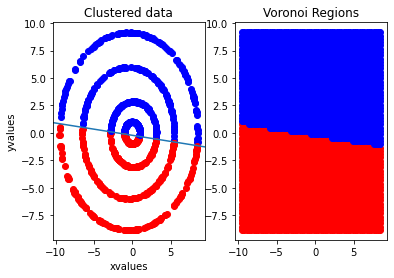

In [4]:
fig,(plt1,plt2)=plt.subplots(1,2)
def voronoi_regions(mean_array,steps,k,cluster_color):
  min_xy=np.min(data_array, axis=0)
  min_x=min_xy[0]
  min_y=min_xy[1]
  max_xy=np.max(data_array, axis=0)
  max_x=max_xy[0]
  max_y=max_xy[1]
  tempx=min_x
  tempy=min_y
  while tempy<max_y:
    tempx=min_x
    while(tempx<max_x):
      dist=[]
      for i in range(0,k):
        dist.append(np.linalg.norm(mean_array[i]-[tempx,tempy]))
      min_dis=np.argmin(dist)
      plt2.scatter(tempx,tempy,c=cluster_color[min_dis])
      tempx=tempx+steps
    tempy=tempy+steps
def slope(x1,x2):
    if(x1[0] - x2[0] != 0):
      return (float)(x2[1]-x1[1])/(x2[0]-x1[0])
    return sys.maxint
z=np.zeros(shape=[1000,1])
for i in range(0,1000):
    z[i]=random.randint(0,1)
mean_array=np.zeros(shape=[2,2])
def calc_clustermean(k):
    sum_z=[0,0]
    c=0
    for i in range(0,1000):
        if(z[i]==k):
            sum_z=sum_z+data_array[i]
            c=c+1
    z_mean=sum_z/c
    return z_mean
mean_array[0]=calc_clustermean(0)
mean_array[1]=calc_clustermean(1)
while True:
    change=False
    for i in range(0,1000):
        d0=np.linalg.norm(data_array[i]-mean_array[0])
        d1=np.linalg.norm(data_array[i]-mean_array[1])
        min_d=min(d0,d1)
        if(min_d==d0):
            cluster=0
        else:
            cluster=1

        if(z[i]==0):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[0])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                change=True
        else:
            if(min_d<np.linalg.norm(data_array[i]-mean_array[1])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                change=True
    if(change==False):
        break
x1=calc_clustermean(0)
x2=calc_clustermean(1)
m1=slope(x1,x2)
x=x1+x2
x=x/2
m2=-1/m1
cluster_color=['r','b']
import matplotlib.colors as mcolors
for i in range(0,1000):
    if(z[i]==0):
        plt1.scatter(data_array[i][0],data_array[i][1],c='r')
    if(z[i]==1):
        plt1.scatter(data_array[i][0],data_array[i][1],c='b')
voronoi_regions(mean_array,0.3,2,cluster_color)
plt1.axline(x,slope=m2)
plt1.set_title("Clustered data")
plt1.set_xlabel("xvalues")
plt1.set_ylabel("yvalues")
plt2.set_title("Voronoi Regions")
plt.show()

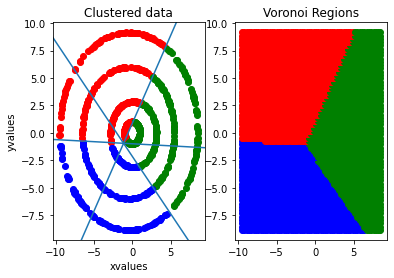

In [7]:
fig,(plt1,plt2)=plt.subplots(1,2)
def voronoi_regions(mean_array,steps,k,cluster_color):
  min_xy=np.min(data_array, axis=0)
  min_x=min_xy[0]
  min_y=min_xy[1]
  max_xy=np.max(data_array, axis=0)
  max_x=max_xy[0]
  max_y=max_xy[1]
  tempx=min_x
  tempy=min_y
  while tempy<max_y:
    tempx=min_x
    while(tempx<max_x):
      dist=[]
      for i in range(0,k):
        dist.append(np.linalg.norm(mean_array[i]-[tempx,tempy]))
      min_dis=np.argmin(dist)
      plt2.scatter(tempx,tempy,c=cluster_color[min_dis])
      tempx=tempx+steps
    tempy=tempy+steps
z=np.zeros(shape=[1000,1])
for i in range(0,1000):
    z[i]=random.randint(0,2)
mean_array=np.zeros(shape=[3,2])
mean_array[0]=calc_clustermean(0)
mean_array[1]=calc_clustermean(1)
mean_array[2]=calc_clustermean(2)
while True:
    change=False
    for i in range(0,1000):
        d0=np.linalg.norm(data_array[i]-mean_array[0])
        d1=np.linalg.norm(data_array[i]-mean_array[1])
        d2=np.linalg.norm(data_array[i]-mean_array[2])
        min_d=min(d0,d1,d2)
        if(min_d==d0):
            cluster=0
        if(min_d==d1):
            cluster=1
        if(min_d==d2):
            cluster=2
        if(z[i]==0):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[0])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                change=True
        elif(z[i]==1):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[1])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                change=True
        elif(z[i]==2):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[2])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                change=True
        else:
            if(min_d<np.linalg.norm(data_array[i]-mean_array[3])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                change=True
    if(change==False):
        break
for i in range(0,3):
    for j in range(i+1,3):
        x=calc_clustermean(i)
        y=calc_clustermean(j)
        m=slope(x,y)
        plt1.axline((x+y)/2,slope=-1/m)
cluster_color=['r','b','g']
for i in range(0,1000):
    if(z[i]==0):
        plt1.scatter(data_array[i][0],data_array[i][1],c='r')
    if(z[i]==1):
        plt1.scatter(data_array[i][0],data_array[i][1],c='b')
    if(z[i]==2):
        plt1.scatter(data_array[i][0],data_array[i][1],c='g')
voronoi_regions(mean_array,0.3,3,cluster_color)
plt1.set_title("Clustered data")
plt1.set_xlabel("xvalues")
plt1.set_ylabel("yvalues")
plt2.set_title("Voronoi Regions")
plt.show()

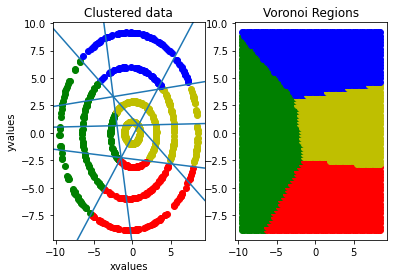

In [6]:
fig,(plt1,plt2)=plt.subplots(1,2)
def voronoi_regions(mean_array,steps,k,cluster_color):
  min_xy=np.min(data_array, axis=0)
  min_x=min_xy[0]
  min_y=min_xy[1]
  max_xy=np.max(data_array, axis=0)
  max_x=max_xy[0]
  max_y=max_xy[1]
  tempx=min_x
  tempy=min_y
  while tempy<max_y:
    tempx=min_x
    while(tempx<max_x):
      dist=[]
      for i in range(0,k):
        dist.append(np.linalg.norm(mean_array[i]-[tempx,tempy]))
      min_dis=np.argmin(dist)
      plt2.scatter(tempx,tempy,c=cluster_color[min_dis])
      tempx=tempx+steps
    tempy=tempy+steps
z=np.zeros(shape=[1000,1])
for i in range(0,1000):
    z[i]=random.randint(0,3)
mean_array=np.zeros(shape=[4,2])
mean_array[0]=calc_clustermean(0)
mean_array[1]=calc_clustermean(1)
mean_array[2]=calc_clustermean(2)
mean_array[3]=calc_clustermean(3)
while True:
    change=False
    for i in range(0,1000):
        d0=np.linalg.norm(data_array[i]-mean_array[0])
        d1=np.linalg.norm(data_array[i]-mean_array[1])
        d2=np.linalg.norm(data_array[i]-mean_array[2])
        d3=np.linalg.norm(data_array[i]-mean_array[3])
        min_d=min(d0,d1,d2,d3)
        if(min_d==d0):
            cluster=0
        if(min_d==d1):
            cluster=1
        if(min_d==d2):
            cluster=2
        if(min_d==d3):
            cluster=3

        if(z[i]==0):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[0])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                change=True
        elif(z[i]==1):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[1])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                change=True
        elif(z[i]==2):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[2])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                change=True
        else:
            if(min_d<np.linalg.norm(data_array[i]-mean_array[3])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                change=True
    if(change==False):
        break

for i in range(0,4):
    for j in range(i+1,4):
        x=calc_clustermean(i)
        y=calc_clustermean(j)
        m=slope(x,y)
        plt1.axline((x+y)/2,slope=-1/m)
cluster_color=['r','b','g','y']
import matplotlib.colors as mcolors
for i in range(0,1000):
    if(z[i]==0):
        plt1.scatter(data_array[i][0],data_array[i][1],c='r')
    if(z[i]==1):
        plt1.scatter(data_array[i][0],data_array[i][1],c='b')
    if(z[i]==2):
        plt1.scatter(data_array[i][0],data_array[i][1],c='g')
    if(z[i]==3):
        plt1.scatter(data_array[i][0],data_array[i][1],c='y')
voronoi_regions(mean_array,0.3,4,cluster_color)
plt1.set_title("Clustered data")
plt1.set_xlabel("xvalues")
plt1.set_ylabel("yvalues")
plt2.set_title("Voronoi Regions")
plt.show()

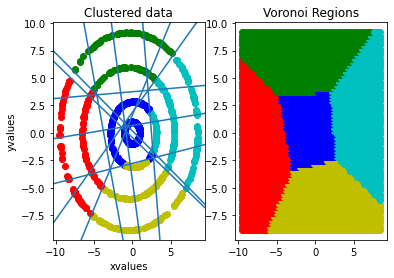

In [5]:
fig,(plt1,plt2)=plt.subplots(1,2)
def voronoi_regions(mean_array,steps,k,cluster_color):
  min_xy=np.min(data_array, axis=0)
  min_x=min_xy[0]
  min_y=min_xy[1]
  max_xy=np.max(data_array, axis=0)
  max_x=max_xy[0]
  max_y=max_xy[1]
  tempx=min_x
  tempy=min_y
  while tempy<max_y:
    tempx=min_x
    while(tempx<max_x):
      dist=[]
      for i in range(0,k):
        dist.append(np.linalg.norm(mean_array[i]-[tempx,tempy]))
      min_dis=np.argmin(dist)
      plt2.scatter(tempx,tempy,c=cluster_color[min_dis])
      tempx=tempx+steps
    tempy=tempy+steps
z=np.zeros(shape=[1000,1])
for i in range(0,1000):
    z[i]=random.randint(0,4)
mean_array=np.zeros(shape=[5,2])
mean_array[0]=calc_clustermean(0)
mean_array[1]=calc_clustermean(1)
mean_array[2]=calc_clustermean(2)
mean_array[3]=calc_clustermean(3)
mean_array[4]=calc_clustermean(4)
while True:
    change=False
    for i in range(0,1000):
        d0=np.linalg.norm(data_array[i]-mean_array[0])
        d1=np.linalg.norm(data_array[i]-mean_array[1])
        d2=np.linalg.norm(data_array[i]-mean_array[2])
        d3=np.linalg.norm(data_array[i]-mean_array[3])
        d4=np.linalg.norm(data_array[i]-mean_array[4])
        min_d=min(d0,d1,d2,d3,d4)
        if(min_d==d0):
            cluster=0
        if(min_d==d1):
            cluster=1
        if(min_d==d2):
            cluster=2
        if(min_d==d3):
            cluster=3
        if(min_d==d4):
            cluster=4

        if(z[i]==0):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[0])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                mean_array[4]=calc_clustermean(4)
                change=True
        elif(z[i]==1):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[1])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                mean_array[4]=calc_clustermean(4)
                change=True
        elif(z[i]==2):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[2])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                mean_array[4]=calc_clustermean(4)
                change=True
        elif(z[i]==3):
            if(min_d<np.linalg.norm(data_array[i]-mean_array[3])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                mean_array[4]=calc_clustermean(4)
                change=True
        else:
            if(min_d<np.linalg.norm(data_array[i]-mean_array[4])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                mean_array[4]=calc_clustermean(4)
                change=True
    if(change==False):
        break
for i in range(0,5):
    for j in range(i+1,5):
        x=calc_clustermean(i)
        y=calc_clustermean(j)
        m=slope(x,y)
        plt1.axline((x+y)/2,slope=-1/m)
cluster_color=['r','b','g','y','c']
for i in range(0,1000):
    if(z[i]==0):
        plt1.scatter(data_array[i][0],data_array[i][1],c='r')
    if(z[i]==1):
        plt1.scatter(data_array[i][0],data_array[i][1],c='b')
    if(z[i]==2):
        plt1.scatter(data_array[i][0],data_array[i][1],c='g')
    if(z[i]==3):
        plt1.scatter(data_array[i][0],data_array[i][1],c='y')
    if(z[i]==4):
        plt1.scatter(data_array[i][0],data_array[i][1],c='c')
voronoi_regions(mean_array,0.3,5,cluster_color)
plt1.set_title("Clustered data")
plt1.set_xlabel("xvalues")
plt1.set_ylabel("yvalues")
plt2.set_title("Voronoi Regions")
plt.show()